In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from datetime import datetime

### 1) 시계열데이터의 값에 대한 선형 보간법

In [5]:
datestrs = ['12/1/2016', '12/03/2016', '12/04/2016', '12/10/2016']
dates = pd.to_datetime(datestrs)
print(dates)

ts = Series([1, np.nan, np.nan, 10], index=dates)
print(ts)

ts_intp_linear = ts.interpolate(method='values')
# method='values' -> default
# pad -> 바로 앞 value 사용
print(ts_intp_linear)

DatetimeIndex(['2016-12-01', '2016-12-03', '2016-12-04', '2016-12-10'], dtype='datetime64[ns]', freq=None)
2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64
2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64


### 2) 시계열 날짜 index를 기준으로 선형 보간법

In [7]:
print(ts)

ts_intp_time = ts.interpolate(method='time')
print(ts_intp_time)

2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64
2016-12-01     1.0
2016-12-03     3.0
2016-12-04     4.0
2016-12-10    10.0
dtype: float64


### 3) DataFrame 값에 대한 선형 보간법

In [10]:
df = DataFrame({'C1':[1, 2, np.nan, np.nan, 5], 'C2':[6, 8, 10, np.nan, 20]})
print(df)

df_intp_values = df.interpolate(method='values')
print(df_intp_values)

print(df.interpolate())

    C1    C2
0  1.0   6.0
1  2.0   8.0
2  NaN  10.0
3  NaN   NaN
4  5.0  20.0
    C1    C2
0  1.0   6.0
1  2.0   8.0
2  3.0  10.0
3  4.0  15.0
4  5.0  20.0
    C1    C2
0  1.0   6.0
1  2.0   8.0
2  3.0  10.0
3  4.0  15.0
4  5.0  20.0


### 4) 결측값 보간 개수 제한하기

In [11]:
df.interpolate(method='values', limit=1) # column마다 1개를 앞에서부터

,C1,C2
0,1.0,6.0
1,2.0,8.0
2,3.0,10.0
3,NaN,15.0
4,5.0,20.0


In [12]:
df.interpolate(method='values', limit=1, limit_direction='backward')
# column마다 1개를 뒤에서부터

,C1,C2
0,1.0,6.0
1,2.0,8.0
2,NaN,10.0
3,4.0,15.0
4,5.0,20.0


## scipy - interpolate

In [20]:
import numpy as np
import scipy.interpolate as ip
from scipy.interpolate import splrep, splev, interp1d
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

x0= [ 0.          0.71428571  1.42857143  2.14285714  2.85714286  3.57142857
  4.28571429  5.          5.71428571  6.42857143  7.14285714  7.85714286
  8.57142857  9.28571429 10.        ]


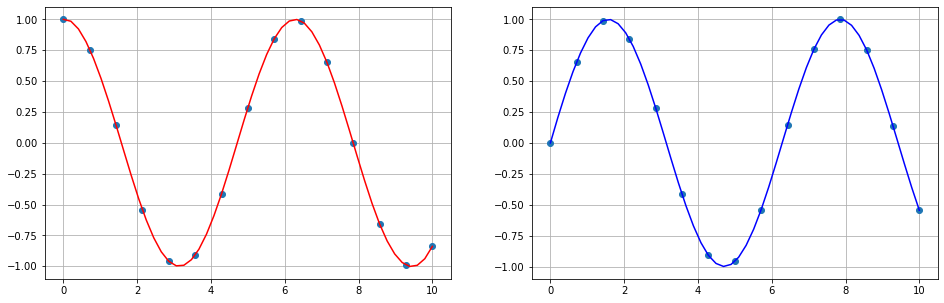

In [14]:
# 0~10까지 15개로 나누어 점을 찍음
x0 = np.linspace(0, 10, 15)
print('x0=', x0)

# cosine 값을 계산
y0 = np.cos(x0)

# x, y(샘플)값을 주고 추정하는 스플라인 곡선
spl = splrep(x0, y0)

# 0~10까지 50구간에 대한 모든 점들을 위 스플라인 곡선으로 추정
x1 = np.linspace(0, 10, 50)
y1 = splev(x1, spl)

# Plotting
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(x0, y0, 'o')
plt.plot(x1, y1, 'r')
plt.grid()

# sine곡선으로 추정
y2 = np.sin(x0)
spl2 = splrep(x0, y2)
y3 = splev(x1, spl2)

plt.subplot(122)
plt.plot(x0, y2, 'o')
plt.plot(x1, y3, 'b')
plt.grid()
plt.show()

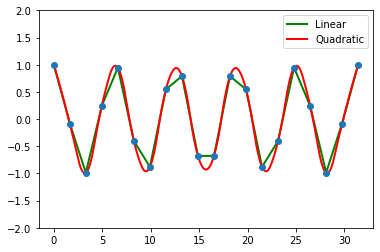

In [19]:
# Cosine 함수를 0부터 10pi까지 20개 값 생성
x = np.linspace(0,10*np.pi, 20)
y = np.cos(x)

# interpolate 함수로 보간법을 적용하여 linear(선형보정), quadratic(곡선보정)
# 두가지 방법 사용
fl = interp1d(x, y, kind = 'linear')
fq = interp1d(x, y, kind = 'quadratic')
# 보간법의 종류는 linear, nearest, zero, slinear, quadratic, cubic, previous,
# next 등이 있다 (default = linear)

xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)

# Plotting
plt.plot(xint, yintl, color = 'green', linewidth=2)
plt.plot(xint, yintq, color = 'red', linewidth=2)
plt.legend(['Linear', 'Quadratic'])
plt.plot(x,y,'o')
plt.ylim(-2,2)
plt.show()

### noise spline-fitting

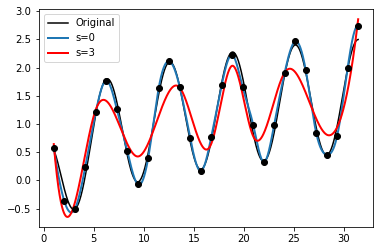

In [22]:
sample = 30
x = np.linspace(1, 10*np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10

# s = smoothing factor
f0 = UnivariateSpline(x, y, s=0)
f3 = UnivariateSpline(x, y, s=3)

xint = np.linspace(x.min(), x.max(), 1000)
yint0 = f0(xint)
yint3 = f3(xint)

plt.plot(xint, np.cos(xint) + np.log10(xint), color='black')
plt.plot(xint, yint0, linewidth=2)
plt.plot(xint, yint3, color='red', linewidth=2)
plt.legend(['Original', 's=0', 's=3'], loc=2)
plt.plot(x, y, 'o', color='black')